In [1]:
import pandas as pd
import os
import seaborn as sns
import  matplotlib.pyplot as plt
from pathlib import Path

In [2]:
df = pd.read_csv("hf://datasets/dazzle-nu/CIS435-CreditCardFraudDetection/fraudTrain.csv")
df.head()

/Users/romacarapetean/Desktop/Projects/Credit_Card_Fraud_Detection/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Unnamed: 23', '6006'],
      dtype='object')


In [4]:
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
Unnamed: 23              1048575
6006                     1048575
dtype: int64


The dataset doesn't have any null values, however it has Personal Data columns like and unnamed columns:
'cc_num', 'trans_num', 'first', 'last', 'street', 'Unnamed: 0', '6006', 'Unnamed: 23' which are gonna be deleted in the preprocessing step

In [6]:
# Read the preprocessed DataFrame for further visualization
cleaned_path = Path('../data_cache/cleanedFraudDataset.csv')
preprocessed_df = pd.read_csv(cleaned_path)
preprocessed_df.head()

,is_fraud,merchant_encoding,age,user_merchant_distance_km,day_of_week,hour,month,is_weekend,is_night,category_encoded,...,zip_encoded,job_freq,city_freq,gender_encoded,amt_log,city_pop_log,amt_bin_encoded,city_pop_bin_encoded,amt_outlier,city_pop_outlier
0,0,514,31,78.6,6,0,1,1,1,0.014526,...,0.000000,0.002762,0.001579,0,1.786747,8.159375,0,0,0,0
1,0,241,41,30.2,6,0,1,1,1,0.013973,...,0.000000,0.003930,0.002779,0,4.684259,5.010635,2,0,0,0
2,0,390,57,108.2,6,0,1,1,1,0.002435,...,0.000000,0.000380,0.000380,1,5.398660,8.332068,2,0,1,0
3,0,360,52,95.7,6,0,1,1,1,0.004679,...,0.037975,0.001940,0.000377,1,3.828641,7.570443,1,0,0,0
4,0,297,33,77.6,6,0,1,1,1,0.003008,...,0.000000,0.001571,0.001571,1,3.760269,4.605170,1,0,0,0


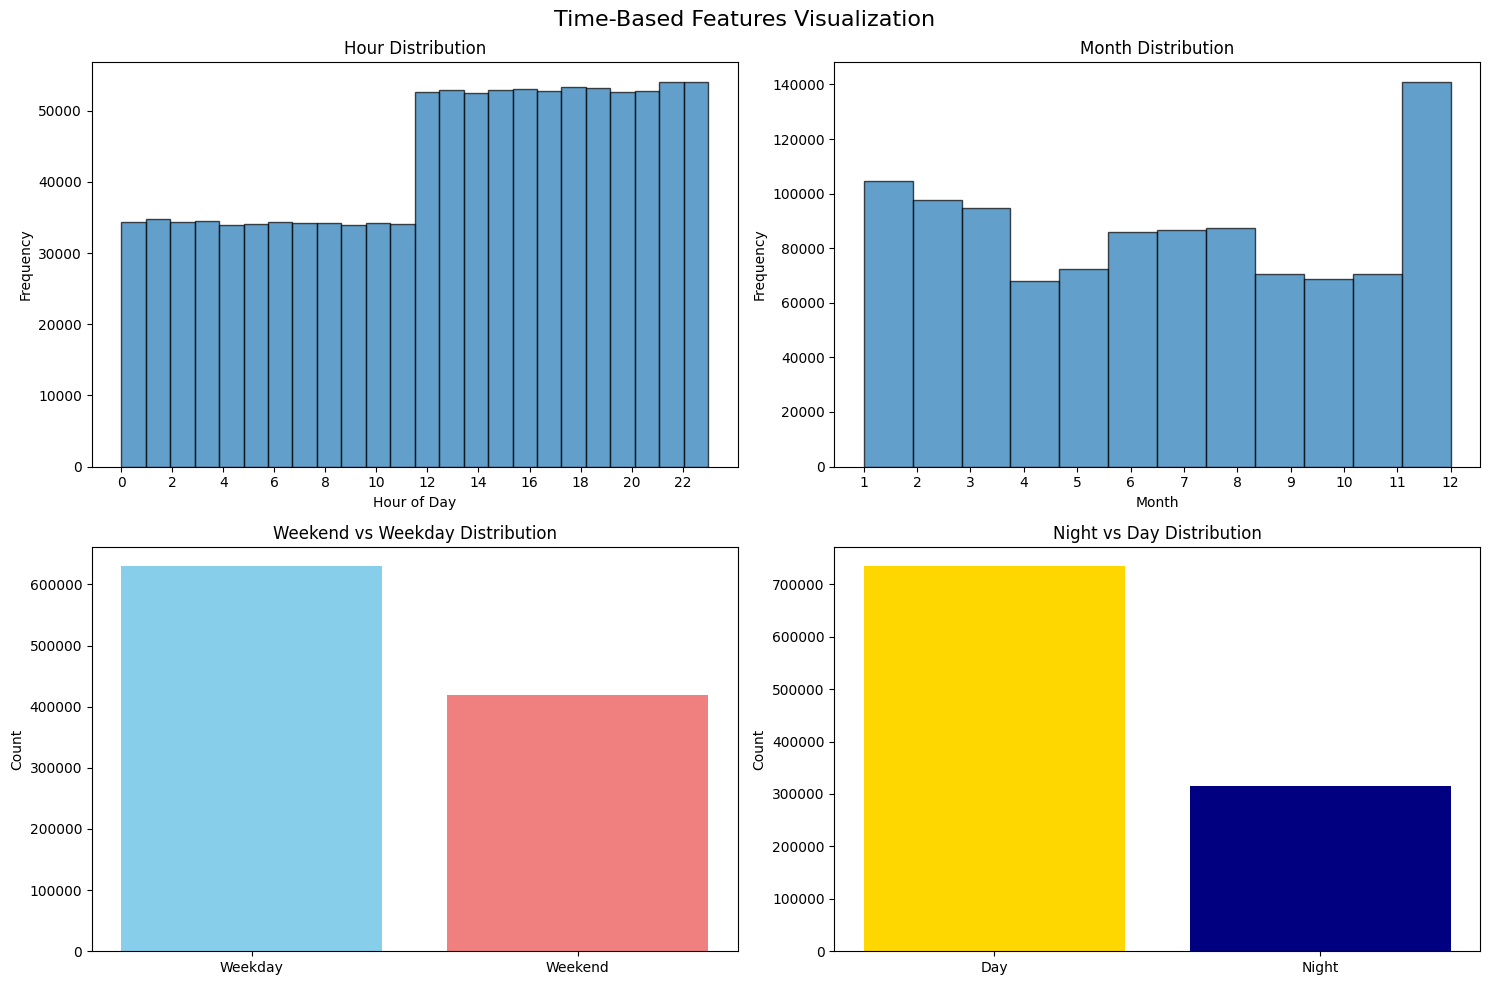


Time Features Summary:

HOUR:
  Data type: int64
  Unique values: 24
  Value counts:
hour
0     34412
1     34757
2     34407
3     34556
4     33943
5     34106
6     34316
7     34158
8     34256
9     34006
10    34236
11    34089
12    52703
13    52964
14    52542
15    52976
16    53114
17    52841
18    53392
19    53135
20    52628
21    52841
22    54103
23    54094
Name: count, dtype: int64

MONTH:
  Data type: int64
  Unique values: 12
  Value counts:
month
1     104727
2      97657
3      94671
4      68078
5      72532
6      86064
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
Name: count, dtype: int64

IS_WEEKEND:
  Data type: int64
  Unique values: 2
  Value counts:
is_weekend
0    629579
1    418996
Name: count, dtype: int64

IS_NIGHT:
  Data type: int64
  Unique values: 2
  Value counts:
is_night
0    734197
1    314378
Name: count, dtype: int64


In [6]:
# Visualize time-based features
time_features = ['hour', 'month', 'is_weekend', 'is_night']

# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time-Based Features Visualization', fontsize=16)

# Hour distribution
if 'hour' in preprocessed_df.columns:
    axes[0, 0].hist(preprocessed_df['hour'], bins=24, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Hour Distribution')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_xticks(range(0, 24, 2))

# Month distribution
if 'month' in preprocessed_df.columns:
    axes[0, 1].hist(preprocessed_df['month'], bins=12, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Month Distribution')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xticks(range(1, 13))

# Weekend vs Weekday
if 'is_weekend' in preprocessed_df.columns:
    weekend_counts = preprocessed_df['is_weekend'].value_counts()
    axes[1, 0].bar(['Weekday', 'Weekend'], weekend_counts.values, color=['skyblue', 'lightcoral'])
    axes[1, 0].set_title('Weekend vs Weekday Distribution')
    axes[1, 0].set_ylabel('Count')

# Night vs Day
if 'is_night' in preprocessed_df.columns:
    night_counts = preprocessed_df['is_night'].value_counts()
    axes[1, 1].bar(['Day', 'Night'], night_counts.values, color=['gold', 'navy'])
    axes[1, 1].set_title('Night vs Day Distribution')
    axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTime Features Summary:")
for feature in time_features:
    if feature in preprocessed_df.columns:
        print(f"\n{feature.upper()}:")
        print(f"  Data type: {preprocessed_df[feature].dtype}")
        print(f"  Unique values: {preprocessed_df[feature].nunique()}")
        print(f"  Value counts:")
        print(preprocessed_df[feature].value_counts().sort_index())
        

In [7]:
# Visualize ZIP code frequency distribution
plt.figure(figsize=(15, 8))

# Get ZIP code value counts
zip_counts = preprocessed_df['zip'].value_counts()

# Plot histogram of ZIP frequencies (how many times each ZIP appears)
plt.subplot(2, 1, 1)
frequency_distribution = zip_counts.value_counts().sort_index()
plt.bar(frequency_distribution.index, frequency_distribution.values, edgecolor='black', alpha=0.7)
plt.title('Distribution of ZIP Code Frequencies')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of ZIP Codes')
plt.grid(True, alpha=0.3)

# Plot top 20 most frequent ZIP codes
plt.subplot(2, 1, 2)
top_zips = zip_counts.head(20)
plt.bar(range(len(top_zips)), top_zips.values, edgecolor='black', alpha=0.7)
plt.title('Top 20 Most Frequent ZIP Codes')
plt.xlabel('ZIP Code Rank')
plt.ylabel('Frequency')
plt.xticks(range(len(top_zips)), [str(zip_code) for zip_code in top_zips.index], rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nZIP Code Statistics:")
print(f"Total unique ZIP codes: {preprocessed_df['zip'].nunique()}")
print(f"Total transactions: {len(preprocessed_df)}")
print(f"Average transactions per ZIP: {len(preprocessed_df) / preprocessed_df['zip'].nunique():.2f}")
print(f"Most frequent ZIP: {zip_counts.index[0]} ({zip_counts.iloc[0]} occurrences)")
print(f"Least frequent ZIP frequency: {zip_counts.iloc[-1]} occurrences")
print(f"ZIP codes with only 1 occurrence: {sum(zip_counts == 1)}")


KeyError: 'zip'

<Figure size 1500x800 with 0 Axes>

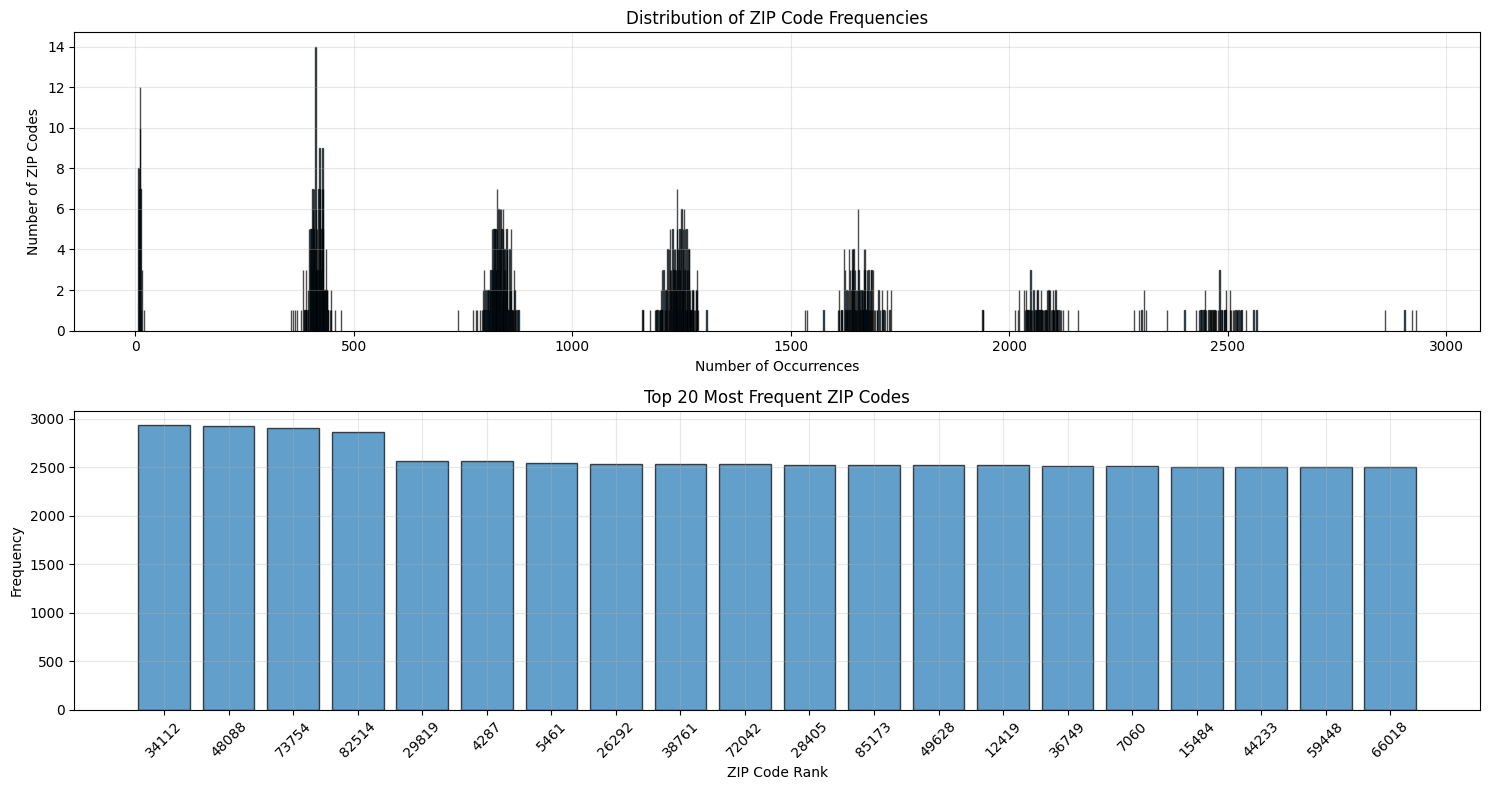


ZIP Code Statistics:
Total unique ZIP codes: 952
Total transactions: 1048575
Average transactions per ZIP: 1101.44
Most frequent ZIP: 34112 (2931 occurrences)
Least frequent ZIP frequency: 7 occurrences
ZIP codes with only 1 occurrence: 0


In [ ]:
# Visualize ZIP code frequency distribution
plt.figure(figsize=(15, 8))

# Get ZIP code value counts
zip_counts = preprocessed_df['zip'].value_counts()

# Plot histogram of ZIP frequencies (how many times each ZIP appears)
plt.subplot(2, 1, 1)
frequency_distribution = zip_counts.value_counts().sort_index()
plt.bar(frequency_distribution.index, frequency_distribution.values, edgecolor='black', alpha=0.7)
plt.title('Distribution of ZIP Code Frequencies')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of ZIP Codes')
plt.grid(True, alpha=0.3)

# Plot top 20 most frequent ZIP codes
plt.subplot(2, 1, 2)
top_zips = zip_counts.head(20)
plt.bar(range(len(top_zips)), top_zips.values, edgecolor='black', alpha=0.7)
plt.title('Top 20 Most Frequent ZIP Codes')
plt.xlabel('ZIP Code Rank')
plt.ylabel('Frequency')
plt.xticks(range(len(top_zips)), [str(zip_code) for zip_code in top_zips.index], rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nZIP Code Statistics:")
print(f"Total unique ZIP codes: {preprocessed_df['zip'].nunique()}")
print(f"Total transactions: {len(preprocessed_df)}")
print(f"Average transactions per ZIP: {len(preprocessed_df) / preprocessed_df['zip'].nunique():.2f}")
print(f"Most frequent ZIP: {zip_counts.index[0]} ({zip_counts.iloc[0]} occurrences)")
print(f"Least frequent ZIP frequency: {zip_counts.iloc[-1]} occurrences")
print(f"ZIP codes with only 1 occurrence: {sum(zip_counts == 1)}")
